<a href="https://colab.research.google.com/github/nahbos/AUT-Neural-Networks/blob/main/HW03/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### - Sobhan Moradian Daghigh
#### - 4/24/2022
#### - ANN - HW03

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import itertools
import warnings
warnings.filterwarnings("ignore")

### Q3.

In [ ]:
x_train = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/train/X_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/train/y_train.txt', header=None, delim_whitespace=True) - 1

x_dataset = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/test/X_test.txt', header=None, delim_whitespace=True)
y_dataset = pd.read_csv('https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW03/Dataset/test/y_test.txt', header=None, delim_whitespace=True) - 1

x_test, x_val, y_test, y_val = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=1)

x_train = x_train.to_numpy(dtype='float')
x_test  = x_test.to_numpy(dtype='float')
x_val   = x_val.to_numpy(dtype='float')

(x_train.shape, x_test.shape, x_val.shape)

((7352, 561), (2062, 561), (885, 561))

### Q4.

In [ ]:
class EarlyStoppingCallback(keras.callbacks.Callback):
  def __init__(self, patience=0):
    super(EarlyStoppingCallback, self).__init__()
    self.patience = patience

  def on_train_begin(self, logs=None):
    self.best = np.inf
    self.wait = 0
  
  def on_epoch_end(self, epoch, logs=None):
    current_loss = logs.get('loss')
    if np.less(current_loss, self.best):
      self.best = current_loss
      self.wait = 0
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if np.greater_equal(self.wait, self.patience):
        self.model.stop_training = True
        self.model.set_weights(self.best_weights)

In [ ]:
es_callback = EarlyStoppingCallback(patience=5)

In [ ]:
n_class = y_train.nunique()[0]

In [ ]:
def create_model(layers):
  model = keras.Sequential()

  for i, nodes in enumerate(layers):
    model.add(Dense(units=nodes, activation='relu'))
    model.add(Dropout(0.1))

  model.add(Dense(units=n_class, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
def create_layers(nodes, max_layers):
  layers = []
  for i in range(1, 1 << len(nodes)):
    subset = [nodes[j] for j in range(len(nodes)) if (i & (1 << j))]
    if len(subset) < max_layers:
      layers.append(subset)
  layers = [np.flip(np.sort(ele)).tolist() for ele in layers]
  layers.sort()
  layers = list(item for item, _ in itertools.groupby(layers))
  
  return layers 

In [ ]:
model = KerasClassifier(build_fn=create_model)

In [ ]:
max_layers = 4
nodes = [32, 64, 128, 256, 512, 1024]

layers = create_layers(nodes, max_layers)
parameters = dict(layers=layers)
grid = GridSearchCV(estimator=model, param_grid=parameters)

In [ ]:
grid.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_.score(x_test, y_test, verbose=1)

In [ ]:
# ---------------------------------------------------------------------------------------------

In [ ]:
# model1

model1 = keras.Sequential()
model1.add(Dense(units=12, activation='relu'))
model1.add(Dense(units=6, activation='softmax'))

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.7914 - accuracy: 0.7121 - val_loss: 0.4893 - val_accuracy: 0.8350
Epoch 2/20
230/230 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.8998 - val_loss: 0.2742 - val_accuracy: 0.9040
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2068 - accuracy: 0.9313 - val_loss: 0.2348 - val_accuracy: 0.9175
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1574 - accuracy: 0.9498 - val_loss: 0.2258 - val_accuracy: 0.9153
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1327 - accuracy: 0.9553 - val_loss: 0.1742 - val_accuracy: 0.9288
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9584 - val_loss: 0.1704 - val_accuracy: 0.9367
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9650 - val_loss: 0.1505 - val_accuracy: 0.9458
Epoch 

In [ ]:
# model2

model2 = keras.Sequential()
model2.add(Dense(units=24, activation='relu'))
model2.add(Dense(units=12, activation='relu'))
model2.add(Dense(units=6, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.6077 - accuracy: 0.7941 - val_loss: 0.3117 - val_accuracy: 0.8972
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.9294 - val_loss: 0.2187 - val_accuracy: 0.9311
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9464 - val_loss: 0.1815 - val_accuracy: 0.9333
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9596 - val_loss: 0.1706 - val_accuracy: 0.9412
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1001 - accuracy: 0.9663 - val_loss: 0.1952 - val_accuracy: 0.9299
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9710 - val_loss: 0.1743 - val_accuracy: 0.9345
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9737 - val_loss: 0.2255 - val_accuracy: 0.9198
Epoch 

In [ ]:
# model3

model3 = keras.Sequential()
model3.add(Dense(units=48, activation='relu'))
model3.add(Dense(units=24, activation='relu'))
model3.add(Dense(units=12, activation='relu'))
model3.add(Dense(units=6, activation='softmax'))

model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.8668 - accuracy: 0.6079 - val_loss: 0.4310 - val_accuracy: 0.8791
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.9049 - val_loss: 0.3021 - val_accuracy: 0.8949
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1514 - accuracy: 0.9406 - val_loss: 0.1761 - val_accuracy: 0.9424
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9596 - val_loss: 0.1861 - val_accuracy: 0.9322
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9672 - val_loss: 0.1938 - val_accuracy: 0.9367
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9671 - val_loss: 0.2066 - val_accuracy: 0.9379
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9733 - val_loss: 0.1638 - val_accuracy: 0.9458
Epoch 

In [ ]:
# model4

model4 = keras.Sequential()
model4.add(Dense(units=48, activation='relu'))
model4.add(Dense(units=6, activation='softmax'))

model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.8309 - val_loss: 0.2673 - val_accuracy: 0.9243
Epoch 2/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9344 - val_loss: 0.2090 - val_accuracy: 0.9107
Epoch 3/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9495 - val_loss: 0.1749 - val_accuracy: 0.9299
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9659 - val_loss: 0.1398 - val_accuracy: 0.9412
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0846 - accuracy: 0.9717 - val_loss: 0.1700 - val_accuracy: 0.9367
Epoch 6/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9728 - val_loss: 0.1478 - val_accuracy: 0.9390
Epoch 7/20
230/230 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9699 - val_loss: 0.1494 - val_accuracy: 0.9469
Epoch 

In [ ]:
# model5

model5 = keras.Sequential()
model5.add(Dense(units=512, activation='relu'))
model5.add(Dense(units=12, activation='relu'))
model5.add(Dense(units=6, activation='softmax'))

model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 1.0213 - accuracy: 0.6015 - val_loss: 0.3449 - val_accuracy: 0.9107
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9331 - val_loss: 0.2358 - val_accuracy: 0.9006
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9483 - val_loss: 0.1572 - val_accuracy: 0.9469
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9622 - val_loss: 0.2076 - val_accuracy: 0.9209
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.9680 - val_loss: 0.1589 - val_accuracy: 0.9480
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9693 - val_loss: 0.1390 - val_accuracy: 0.9446
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9693 - val_loss: 0.1917 - val_accuracy: 0.9333
Epoch 

In [ ]:
# model6

model6 = keras.Sequential()
model6.add(Dense(units=12, activation='relu'))
model6.add(Dense(units=6, activation='softmax'))

model6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model6.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 2.1360 - accuracy: 0.1984 - val_loss: 1.7866 - val_accuracy: 0.1650
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 1.5919 - accuracy: 0.2844 - val_loss: 1.4546 - val_accuracy: 0.2904
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 1.2265 - accuracy: 0.4117 - val_loss: 1.1774 - val_accuracy: 0.4486
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 1.0204 - accuracy: 0.4682 - val_loss: 0.9343 - val_accuracy: 0.4847
Epoch 5/20
230/230 [==============================] - 1s 3ms/step - loss: 0.9281 - accuracy: 0.4967 - val_loss: 0.8606 - val_accuracy: 0.5435
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.9802 - accuracy: 0.4966 - val_loss: 1.5127 - val_accuracy: 0.3751
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.9518 - accuracy: 0.5014 - val_loss: 0.9258 - val_accuracy: 0.4915
Epoch 

In [ ]:
# model7

model7 = keras.Sequential()
model7.add(Dense(units=12, activation='relu'))
model7.add(Dense(units=6, activation='softmax'))

model7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model7.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 0.6808 - accuracy: 0.7726 - val_loss: 0.3924 - val_accuracy: 0.8960
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.9109 - val_loss: 0.2652 - val_accuracy: 0.9254
Epoch 3/20
230/230 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.9350 - val_loss: 0.2421 - val_accuracy: 0.9141
Epoch 4/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9461 - val_loss: 0.1963 - val_accuracy: 0.9356
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 0.1365 - accuracy: 0.9555 - val_loss: 0.2010 - val_accuracy: 0.9186
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1183 - accuracy: 0.9593 - val_loss: 0.1669 - val_accuracy: 0.9390
Epoch 7/20
230/230 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9660 - val_loss: 0.1608 - val_accuracy: 0.9446
Epoch 

In [ ]:
# model8

model8 = keras.Sequential()
model8.add(Dense(units=12, activation='relu'))
model8.add(Dense(units=6, activation='softmax'))

model8.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model8.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[es_callback])

Epoch 1/20
230/230 [==============================] - 1s 3ms/step - loss: 1.7437 - accuracy: 0.2182 - val_loss: 1.3799 - val_accuracy: 0.4079
Epoch 2/20
230/230 [==============================] - 1s 3ms/step - loss: 1.0794 - accuracy: 0.4921 - val_loss: 0.8642 - val_accuracy: 0.5582
Epoch 3/20
230/230 [==============================] - 1s 2ms/step - loss: 0.7182 - accuracy: 0.6085 - val_loss: 0.7000 - val_accuracy: 0.6215
Epoch 4/20
230/230 [==============================] - 1s 3ms/step - loss: 0.6560 - accuracy: 0.6247 - val_loss: 0.7876 - val_accuracy: 0.5876
Epoch 5/20
230/230 [==============================] - 1s 2ms/step - loss: 0.6360 - accuracy: 0.6294 - val_loss: 0.6571 - val_accuracy: 0.6271
Epoch 6/20
230/230 [==============================] - 1s 3ms/step - loss: 0.6367 - accuracy: 0.6340 - val_loss: 0.7956 - val_accuracy: 0.6023
Epoch 7/20
230/230 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.7583 - val_loss: 0.4439 - val_accuracy: 0.8136
Epoch 

In [ ]:
models = [model1, model2, model3, model4, model5, model6, model7, model8]

In [ ]:
for model in models:
  print(model.evaluate(x_test, y_test, verbose=1))

65/65 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9437
[0.16345249116420746, 0.9437439441680908]
65/65 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9399
[0.1956603229045868, 0.9398642182350159]
65/65 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9394
[0.22044987976551056, 0.9393792152404785]
65/65 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9384
[0.1940642148256302, 0.9384093284606934]
65/65 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9365
[0.23314876854419708, 0.9364694356918335]
65/65 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.5616
[0.8290499448776245, 0.5615906715393066]
65/65 [==============================] - 0s 2ms/step - loss: 0.1934 - accuracy: 0.9277
[0.19341464340686798, 0.9277400374412537]
65/65 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9059
[0.2852313816

### Q5.

In [ ]:
class SOM:


    def __init__(self, map_size, lr=0.1):

        # Args: map_size : [map_w, map_h, f=561]

        self.map = np.random.random(size=(map_size[0], map_size[1], map_size[2]))
        self.winners = np.zeros((map_size[0], map_size[1]))

        self.lr0 = lr
        self.lr = self.lr0

        self.R0 = map_size[0] // 2.4
        self.R = self.R0


    def train(self, X, y, T=1000, error_threshold=10**-20):

        # Loss history
        Js = []
        deads = []
        win_dists = []

        for t in range(T):
            prev_map = self.map.copy()

            # Shuffle X in every iteration
            shuffle_ind = np.random.randint(0, X.shape[0], X.shape[0])
            
            win_dist = 0

            for i in range(X.shape[0]):

                x = X[shuffle_ind[i], :]

                # Neuron with most compatibilty with x
                winner = self.find_winner(x)

                # Sum of winner neurons distances
                win_dist += self.cal_euc(self.map[winner], x)

                # Get all neurons in the neighborhood of winner
                NS = self.get_NS(winner)

                # Update weights of all neurons in the neighborhood of winner
                self.update_weights(x, winner, NS, len(X)) 

            # Update learning rate and neighborhood radius (linear decay)
            alpha = t / T
            self.lr = self.lr0 * (1 - alpha)

            self.R = self.R0 * (1 - t / T)


            Js.append(np.linalg.norm(prev_map - self.map))
            dead_cnt = self.get_deads()
            deads.append(dead_cnt)
            win_dists.append(win_dist / X.shape[0])

            if t % 100 == 0 or t == T - 1:
                print(f"Iteration: {t}, Loss: {Js[-1]:.4f}, lr: {self.lr:.4f}, R: {self.R:.4f}, deads: {dead_cnt}, win_avg: {win_dist / X.shape[0]:.4f}")
            
            if Js[-1] < error_threshold:
                print("MIN CHANGE")
                break

        return Js, deads, win_dists
    

    def find_winner(self, x):
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        dists = np.sum((self.map - rep_x) ** 2, axis=2)
        winner = np.unravel_index(np.argmin(dists, axis=None), shape=dists.shape)
        self.winners[winner] = 1
        return winner

    
    def get_deads(self):
      deads = 0
      for i in range(self.map.shape[0]):
        for j in range(self.map.shape[1]):
          if self.winners[i, j] == 0:
            deads += 1
      
      return deads


    def get_NS(self, winner):

        # NS: Neighborhood strength
        NS = np.zeros((self.map.shape[0], self.map.shape[1]))

        # winner i,j
        iw, jw = winner[0], winner[1]
        
        # Winner
        NS[iw, jw] = 1 

        # Circular neighborhood
        R = int(self.R)
        for ri in range(-R, R):
            for rj in range(-R, R):
                if 0 <= iw + ri < self.map.shape[0] and 0 <= jw + rj < self.map.shape[1]:
                  if np.sqrt(ri**2 + rj**2) > R:
                    NS[iw + ri, jw + rj] = 0
                  else:
                    NS[iw + ri, jw + rj] = 1 / ( 1 + np.sqrt(ri**2 + rj**2))
        
        return NS

    def update_weights(self, x, winner, n_strength, X_len):

        # Note: n_strength is already W*H we just need to make it W*H*f
        NS = np.repeat(n_strength[:, :, np.newaxis], self.map.shape[2], axis=2)

        # Difference between inputs and neurons
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        Delta = np.subtract(rep_x, self.map)

        # Update weights
        self.map = np.add(self.map, np.multiply(np.divide(self.lr, X_len), np.multiply(NS, Delta)))


    def cal_euc(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))


    def cal_u_matrix(self): 
      u_matrix = np.zeros((self.map.shape[0], self.map.shape[1]))

      R = 2

      for i in range(0, self.map.shape[0]):
        for j in range(0, self.map.shape[1]):

          sum_dist = 0
          ct = 0

          for ri in range(-R, R):
            for rj in range(-R, R):
              if 0 <= i + ri < self.map.shape[0] and 0 <= j + rj < self.map.shape[1]:
                if np.sqrt(ri**2 + rj**2) < R:
                  sum_dist += self.cal_euc(self.map[i, j], self.map[i + ri, j + rj])
                  ct += 1
          
          u_matrix[i, j] = sum_dist / (ct - 1)

      plt.imshow(u_matrix, cmap='gray')
      plt.title("U-Matrix")
      plt.xlabel("x")
      plt.ylabel("y")
      plt.show()


      def cal_u_matrix2(self): 
        u_matrix = np.zeros((self.map.shape[0], self.map.shape[1]))

        R = int(self.R)

        for i in range(0, self.map.shape[0]):
          for j in range(0, self.map.shape[1]):

            sum_dist = 0
            ct = 0

            for ri in range(-R, R):
              for rj in range(-R, R):
                if 0 <= i + ri < self.map.shape[0] and 0 <= j + rj < self.map.shape[1]:
                  if np.sqrt(ri**2 + rj**2) <= R:
                    sum_dist += self.cal_euc(self.map[i, j], self.map[i + ri, j + rj])
                    ct += 1
            
            u_matrix[i, j] = sum_dist / (ct - 1)

        plt.imshow(u_matrix, cmap='gray')
        plt.title("U-Matrix")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()


    def extract_features(self, x):
        rep_x = np.tile(x, (self.map.shape[0], self.map.shape[1], 1))
        dists = np.sum((self.map - rep_x) ** 2, axis=2)
        return 1/(1+dists)

Iteration: 0, Loss: 32.6489, lr: 0.7000, R: 5.0000, deads: 140, win_avg: 20.0059
Iteration: 100, Loss: 1.9581, lr: 0.6300, R: 4.5000, deads: 77, win_avg: 4.0406
Iteration: 200, Loss: 0.8550, lr: 0.5600, R: 4.0000, deads: 45, win_avg: 3.8858
Iteration: 300, Loss: 0.3397, lr: 0.4900, R: 3.5000, deads: 32, win_avg: 3.7532
Iteration: 400, Loss: 0.2347, lr: 0.4200, R: 3.0000, deads: 22, win_avg: 3.7146
Iteration: 500, Loss: 0.0778, lr: 0.3500, R: 2.5000, deads: 19, win_avg: 3.5964
Iteration: 600, Loss: 0.0518, lr: 0.2800, R: 2.0000, deads: 18, win_avg: 3.5561
Iteration: 700, Loss: 0.0313, lr: 0.2100, R: 1.5000, deads: 18, win_avg: 3.5070
Iteration: 800, Loss: 0.0197, lr: 0.1400, R: 1.0000, deads: 18, win_avg: 3.4774
Iteration: 900, Loss: 0.0073, lr: 0.0700, R: 0.5000, deads: 18, win_avg: 3.4597
Iteration: 999, Loss: 0.0001, lr: 0.0007, R: 0.0050, deads: 18, win_avg: 3.4404


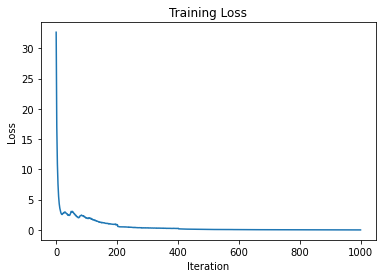

In [24]:
n_class = len(np.unique(y_train))
som_net = SOM(map_size=(n_class * 2, n_class * 2, x_train.shape[1]), lr=0.7)

# Loss
Js, deads, avg_win_dists = som_net.train(x_train, y_train, T=1000)
plt.plot(Js)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

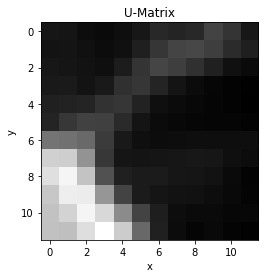

In [25]:
som_net.cal_u_matrix()

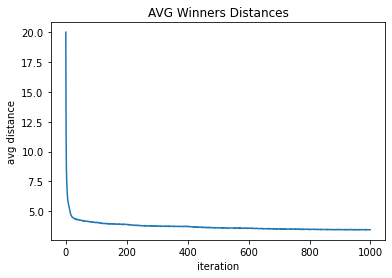

In [26]:
plt.plot(avg_win_dists)
plt.title("AVG Winners Distances")
plt.xlabel("iteration")
plt.ylabel("avg distance")
plt.show()

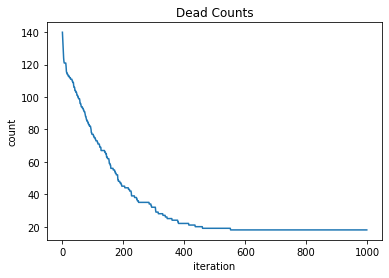

In [27]:
plt.plot(deads)
plt.title("Dead Counts")
plt.xlabel("iteration")
plt.ylabel("count")
plt.show()

In [28]:
# Train
reduced_dim_x_train = []
for x in x_train:
  features = som_net.extract_features(x)
  reduced_dim_x_train.append(features)
reduced_dim_x_train = np.array(reduced_dim_x_train)
reduced_dim_x_train = reduced_dim_x_train.reshape(reduced_dim_x_train.shape[0], (n_class * 2) ** 2)

# Test
reduced_dim_x_test = []
for x in x_test:
  features = som_net.extract_features(x)
  reduced_dim_x_test.append(features)
reduced_dim_x_test = np.array(reduced_dim_x_test)
reduced_dim_x_test = reduced_dim_x_test.reshape(reduced_dim_x_test.shape[0], (n_class * 2) ** 2)

# Val
reduced_dim_x_val = []
for x in x_val:
  features = som_net.extract_features(x)
  reduced_dim_x_val.append(features)
reduced_dim_x_val = np.array(reduced_dim_x_val)
reduced_dim_x_val = reduced_dim_x_val.reshape(reduced_dim_x_val.shape[0], (n_class * 2) ** 2)

In [29]:
reduced_dim_x_train.shape

(7352, 144)

In [30]:
# # model9

# model9 = keras.Sequential()
# model9.add(Dense(units=2048, activation='relu'))
# model9.add(Dense(units=256, activation='relu'))
# model9.add(Dense(units=6, activation='softmax'))

# model9.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# model9.fit(reduced_dim_x_train, y_train, epochs=50, validation_data=(reduced_dim_x_val, y_val), callbacks=[es_callback])

In [31]:
# model9

model9 = keras.Sequential()
model9.add(Dense(units=2048, activation='relu'))
model9.add(Dropout(0.3))
model9.add(Dense(units=512, activation='relu'))
model9.add(Dropout(0.2))
model9.add(Dense(units=6, activation='softmax'))

model9.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model9.fit(reduced_dim_x_train, y_train, epochs=50, validation_data=(reduced_dim_x_val, y_val), callbacks=[es_callback])

Epoch 1/50
230/230 [==============================] - 5s 17ms/step - loss: 0.6151 - accuracy: 0.7318 - val_loss: 0.4238 - val_accuracy: 0.8328
Epoch 2/50
230/230 [==============================] - 4s 16ms/step - loss: 0.3824 - accuracy: 0.8365 - val_loss: 0.3454 - val_accuracy: 0.8520
Epoch 3/50
230/230 [==============================] - 4s 16ms/step - loss: 0.3317 - accuracy: 0.8546 - val_loss: 0.3430 - val_accuracy: 0.8463
Epoch 4/50
230/230 [==============================] - 4s 16ms/step - loss: 0.3302 - accuracy: 0.8592 - val_loss: 0.3064 - val_accuracy: 0.8701
Epoch 5/50
230/230 [==============================] - 4s 16ms/step - loss: 0.3090 - accuracy: 0.8643 - val_loss: 0.3351 - val_accuracy: 0.8373
Epoch 6/50
230/230 [==============================] - 4s 16ms/step - loss: 0.2846 - accuracy: 0.8721 - val_loss: 0.3198 - val_accuracy: 0.8701
Epoch 7/50
230/230 [==============================] - 4s 16ms/step - loss: 0.2807 - accuracy: 0.8751 - val_loss: 0.3163 - val_accuracy: 0.8723

In [36]:
model9.evaluate(reduced_dim_x_test, y_test, verbose=1)

65/65 [==============================] - 1s 7ms/step - loss: 0.2695 - accuracy: 0.8841


[0.2694939076900482, 0.8840931057929993]